In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data for logistic regression (flatten images)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
# Define the logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Extract accuracy and error rates
train_accuracies = history.history['accuracy']
test_accuracies = history.history['val_accuracy']
train_errors = [1 - acc for acc in train_accuracies]
test_errors = [1 - acc for acc in test_accuracies]

Epoch 1/100
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9602 - accuracy: 0.3202 - val_loss: 1.8418 - val_accuracy: 0.3589
Epoch 2/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8837 - accuracy: 0.3504 - val_loss: 1.8084 - val_accuracy: 0.3735
Epoch 3/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8582 - accuracy: 0.3614 - val_loss: 1.8757 - val_accuracy: 0.3487
Epoch 4/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8415 - accuracy: 0.3690 - val_loss: 1.8838 - val_accuracy: 0.3648
Epoch 5/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8326 - accuracy: 0.3719 - val_loss: 1.9030 - val_accuracy: 0.3450
Epoch 6/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8202 - accuracy: 0.3774 - val_loss: 2.0246 - val_accuracy: 0.3306
Epoch 7/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8203 - accuracy: 0.3805 - val_loss: 2.0766 - val_ac

313/313 [==============================] - 3s 10ms/step


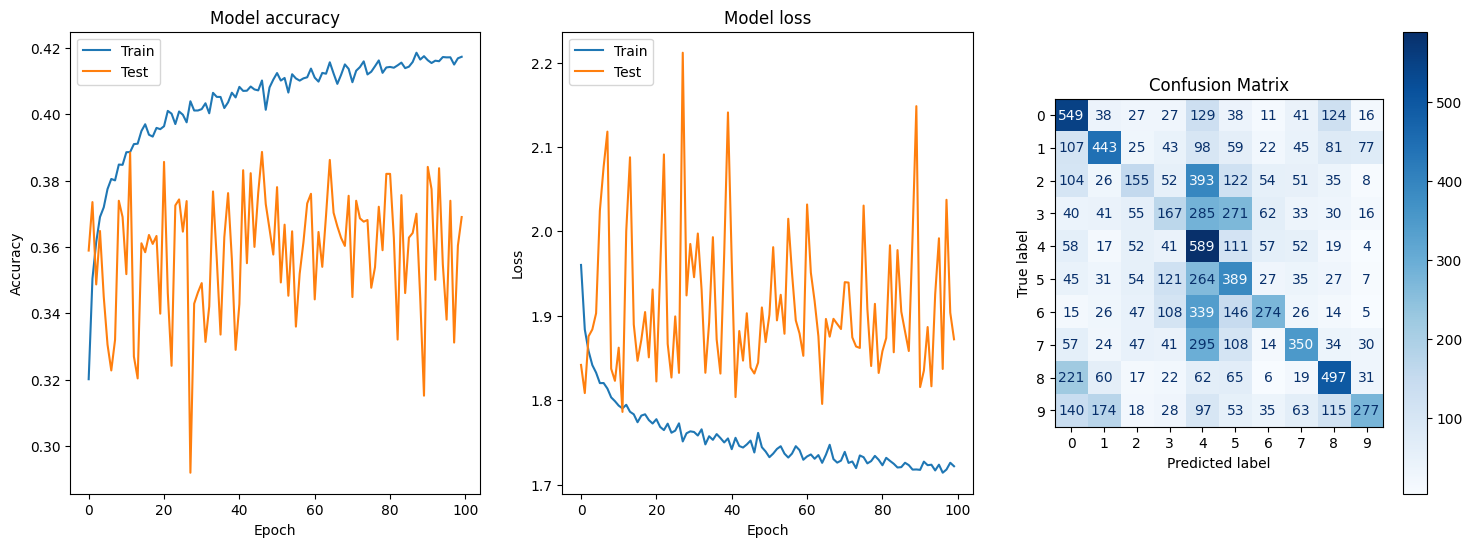

In [5]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Plot accuracy and loss
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot training & validation accuracy values
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

# Generate confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax3, cmap=plt.cm.Blues)
ax3.set_title('Confusion Matrix')

plt.show()

Test Loss: 1.8720976114273071
Test Accuracy: 0.36899998784065247
313/313 [==============================] - 1s 4ms/step


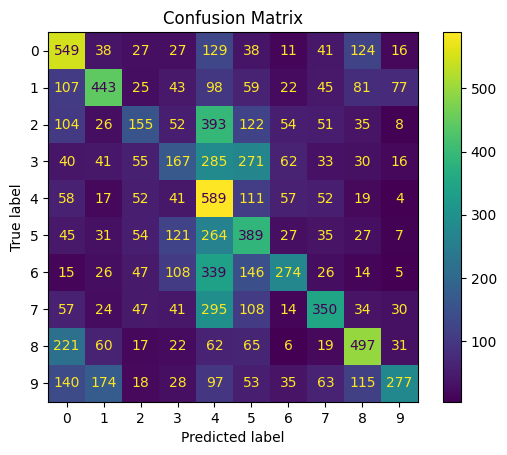


Precision: 0.40740174723405964
Recall: 0.369
F1-score: 0.3650581848356869


In [6]:
# Predict labels for test images
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Get predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot()
plt.title("Confusion Matrix")
plt.show()


# Calculate precision, recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

